In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [9]:
load_dotenv()
model = ChatOpenAI()

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [4]:
class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [5]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

In [6]:
def create_blog(state:BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state


In [7]:
graph = StateGraph(BlogState)
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)
workflow = graph.compile()

In [8]:
initial_state = {'title': 'Future of AI'}
final_state = workflow.invoke(initial_state)
print(final_state)

NameError: name 'model' is not defined

In [ ]:
print(final_state['outline'])
print(final_state['content'])

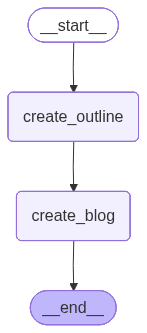

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())